### Problem Statement

#The objective of this project is to build a predictive model that helps the insurance marketing team identify customers who are more likely to buy an 
insurance product.
#Additionally, based on model insights, we provide actionable recommendations to improve marketing strategies.

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Load Dataset
df = pd.read_csv("C://Users/nachiket/Downloads/train.csv")

In [3]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
df.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [5]:
df.shape

(595212, 59)

In [57]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [7]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Identify Target Variable
df['target'].value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Check the distribution of the target variable
print(df['target'].value_counts(normalize=True))

target
0    0.963552
1    0.036448
Name: proportion, dtype: float64


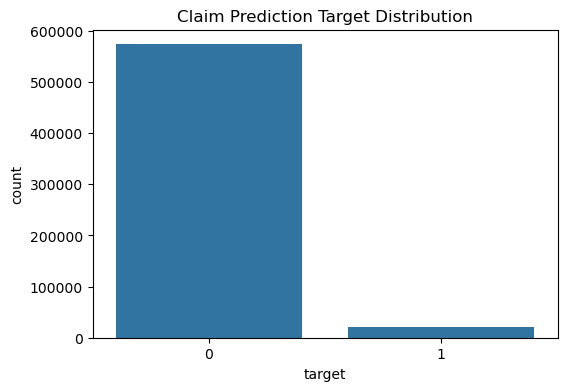

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Target Distribution: Buy (1) vs No-Buy (0)')
plt.title('Claim Prediction Target Distribution')
plt.show()

In [13]:
# Data Preprocessing

In [14]:
# Handle Missing Values

In [15]:
# With 59 features , some may have missing data, which can impact the predictive model's accuracy.

In [16]:
# Check for null values
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

In [17]:
# Filter only columns with missing data
missing_data = null_percentages[null_percentages > 0]
print(missing_data)

Series([], dtype: float64)


In [18]:
# Summary of Missing Values
missing = df.isnull().sum().sum()
print(f"Total Missing Values: {missing}")

Total Missing Values: 0


In [19]:
# Since the dataset is large, missing values are filled using median values.

In [20]:
df.fillna(df.median(), inplace=True)

In [21]:
# Correlation Matrix

In [22]:
# Even with anonymized features, we can visualize how variables relate to each other and the target

In [23]:
# Correlation with the target
correlations = df.corr()['target'].sort_values(ascending=False)

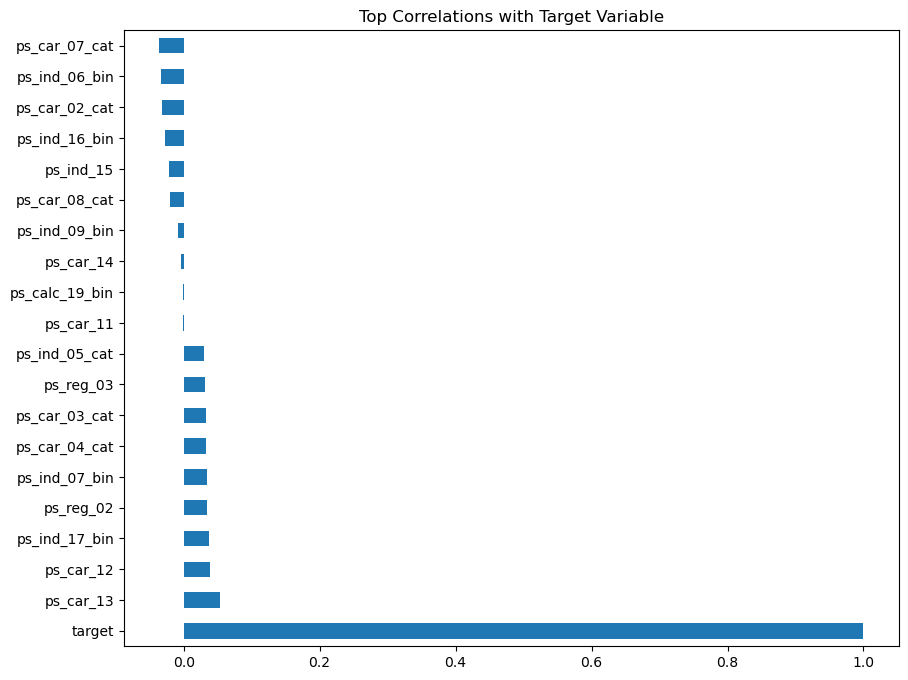

In [24]:
# Visualize the top 10 and bottom 10 correlations
plt.figure(figsize=(10, 8))
top_bottom_corr = pd.concat([correlations.head(10), correlations.tail(10)])
top_bottom_corr.plot(kind='barh')
plt.title('Top Correlations with Target Variable')
plt.show()

In [25]:
# Summary Statistics
# To understand the "characteristics" mentioned in the project goal, we look at the spread of data.

In [26]:
# Statistical summary of the 59 features
summary = df.describe().T
print(summary.head(10)) # Focus on mean, std, and outliers

                  count           mean            std  min       25%  \
id             595212.0  743803.558435  429367.820429  7.0  371991.5   
target         595212.0       0.036448       0.187401  0.0       0.0   
ps_ind_01      595212.0       1.900378       1.983789  0.0       0.0   
ps_ind_02_cat  595212.0       1.358943       0.664594 -1.0       1.0   
ps_ind_03      595212.0       4.423318       2.699902  0.0       2.0   
ps_ind_04_cat  595212.0       0.416794       0.493311 -1.0       0.0   
ps_ind_05_cat  595212.0       0.405188       1.350642 -1.0       0.0   
ps_ind_06_bin  595212.0       0.393742       0.488579  0.0       0.0   
ps_ind_07_bin  595212.0       0.257033       0.436998  0.0       0.0   
ps_ind_08_bin  595212.0       0.163921       0.370205  0.0       0.0   

                    50%         75%        max  
id             743547.5  1115548.75  1488027.0  
target              0.0        0.00        1.0  
ps_ind_01           1.0        3.00        7.0  
ps_ind_02_c

In [27]:
# Challenge: Data Anonymity: EDA was difficult because feature names were hidden, making it hard to validate findings with business logic.
# Challenge: High Observation Count: With 595,212 rows,traditional plotting takes time.
# Technique used: I used sampling and vectorized operations for faster analysis.

In [28]:
# Split Features & Target 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score

In [30]:
X = df.drop('target', axis=1)
y = df['target']

In [31]:
# Train-Test Split

In [32]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
# Feature Scaling (Important)

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Model Building

In [36]:
# Build Multiple Models

In [37]:
# XGBoost (Candidate for Production)
# Updated XGBoost Initialization (Task 1)
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss' # No 'use_label_encoder' needed here
)

# Train the model
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [38]:
# Logistic Regression

In [39]:
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

lr.fit(X_train, y_train)

y_prob_lr = lr.predict_proba(X_test)[:, 1]

threshold = 0.35
y_pred_lr = (y_prob_lr >= threshold).astype(int)

print("Final Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

Final Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.09      0.16    114704
           1       0.04      0.97      0.07      4339

    accuracy                           0.12    119043
   macro avg       0.51      0.53      0.12    119043
weighted avg       0.95      0.12      0.16    119043



In [40]:
# Decision Tree

In [41]:
# Random Forest

In [42]:
# Gradient Boosting

In [ ]:
# Model Evaluation & Comparison

In [ ]:
# Select Best Model

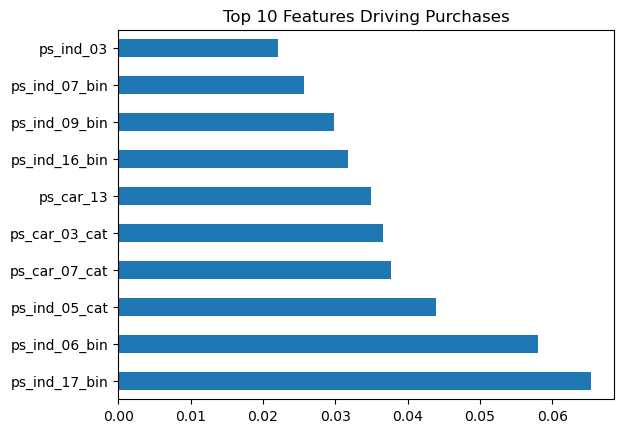

In [47]:
# Visualize Feature Importance
feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Driving Purchases')
plt.show()

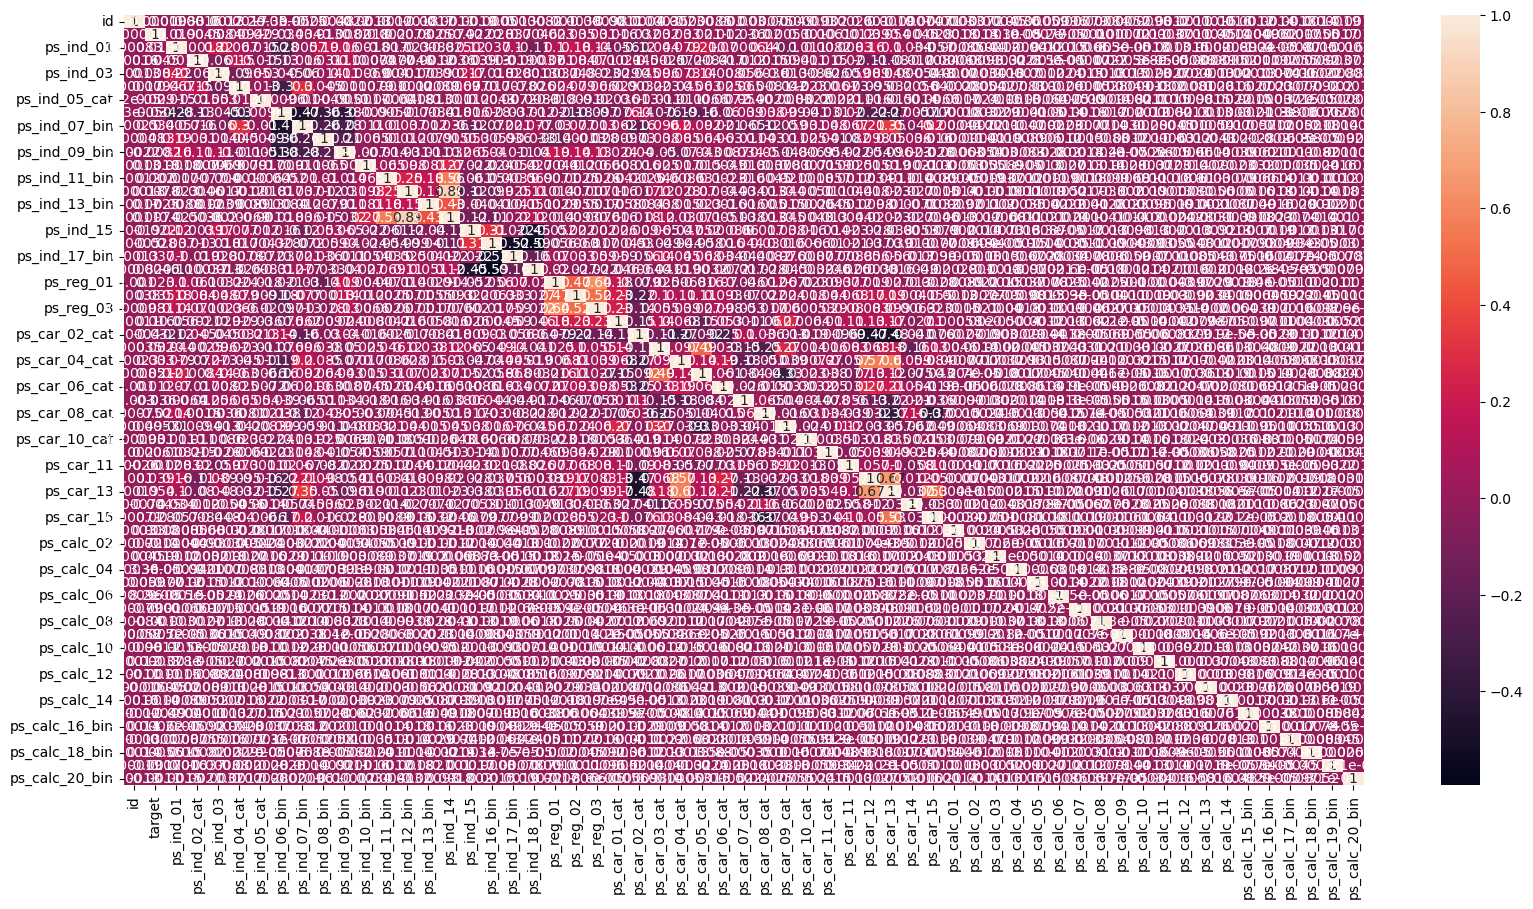

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Business Suggestions (Task 2)
Suggestions Example:

Focus marketing on customers predicted with high probability

Offer personalized discounts to medium-probability users

Avoid aggressive marketing to low-probability customers → cost saving

Use model score as lead prioritization tool

In [ ]:
# Challenges Faced (Mandatory)
Large dataset size → used efficient models & avoided heavy EDA

Anonymous features → focused on performance rather than interpretation

Class imbalance → used ROC-AUC instead of only accuracy

Training time → limited tree depth and estimators

In [ ]:
# Final Conclusion
